# **Project Name**    - DATA MOBILE PRICE RANGE PREDICTION



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** SONKAR ABHISHEK
##### **Team Member 2 -** GOURAV PATIL
##### **Team Member 3 -** AKSHAY PAWAR
##### **Team Member 4 -** RITESH NEULKAR
##### **Team Member 5 -** KEVIN VARSANI

# **Project Summary -**

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **Data Description -**

**Battery_power -** Total energy a battery can store in one time measured in mAh

**Blue -** Has bluetooth or not

**Clock_speed -** speed at which microprocessor executes instructions

**Dual_sim -** Has dual sim support or not

**Fc -** Front Camera mega pixels

**Four_g -** Has 4G or not

**Int_memory -** Internal Memory in Gigabytes

**M_dep -** Mobile Depth in cm

**Mobile_wt -** Weight of mobile phone

**N_cores -** Number of cores of processor

**Pc -** Primary Camera mega pixels

**Px_heig Px_height -** Pixel Resolution Height

**Px_width -** Pixel Resolution Width

**Ram -** Random Access Memory in Mega Bytes

**Sc_h -** Screen Height of mobile in cm

**Sc_w -** Screen Width of mobile in cm

**Talk_time -** longest time that a single battery charge will last

**Three_g -** Has 3G or not

**Touch_screen -** Has touch screen or not

**Wifi -** Has wifi or not

**Price_range -** This is the target variable with value of 0(low cost), 1 (medium cost), 2(high cost) and 3(very high cost)
---



# **GitHub Link -**

https://github.com/RiteshNeulkar/Machine-Learning-classification.git

# **Problem Statement**


In this Project,On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile

**USE:**

This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer
Also it will be usefull for Consumers to verify that they are paying best price for a mobile.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
from sklearn.pipeline import Pipeline
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
from sklearn.metrics import (r2_score,               
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)
from sklearn.linear_model import LinearRegression      # regression model
from xgboost import XGBRegressor                       # xgboost model
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV 
import numpy as np
import seaborn as sns
from scipy.stats import *
import math
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz
from sklearn import linear_model, neighbors
from sklearn.model_selection import train_test_split, cross_val_predict, TimeSeriesSplit, KFold, cross_val_score
import plotly.express as px
!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 1.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.1/571.1 KB 8.5 MB/s eta 0:00:00


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml classifiocation/data_mobile_price_range.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


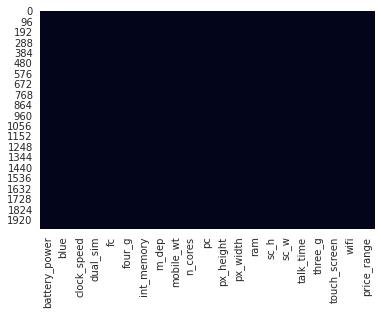

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

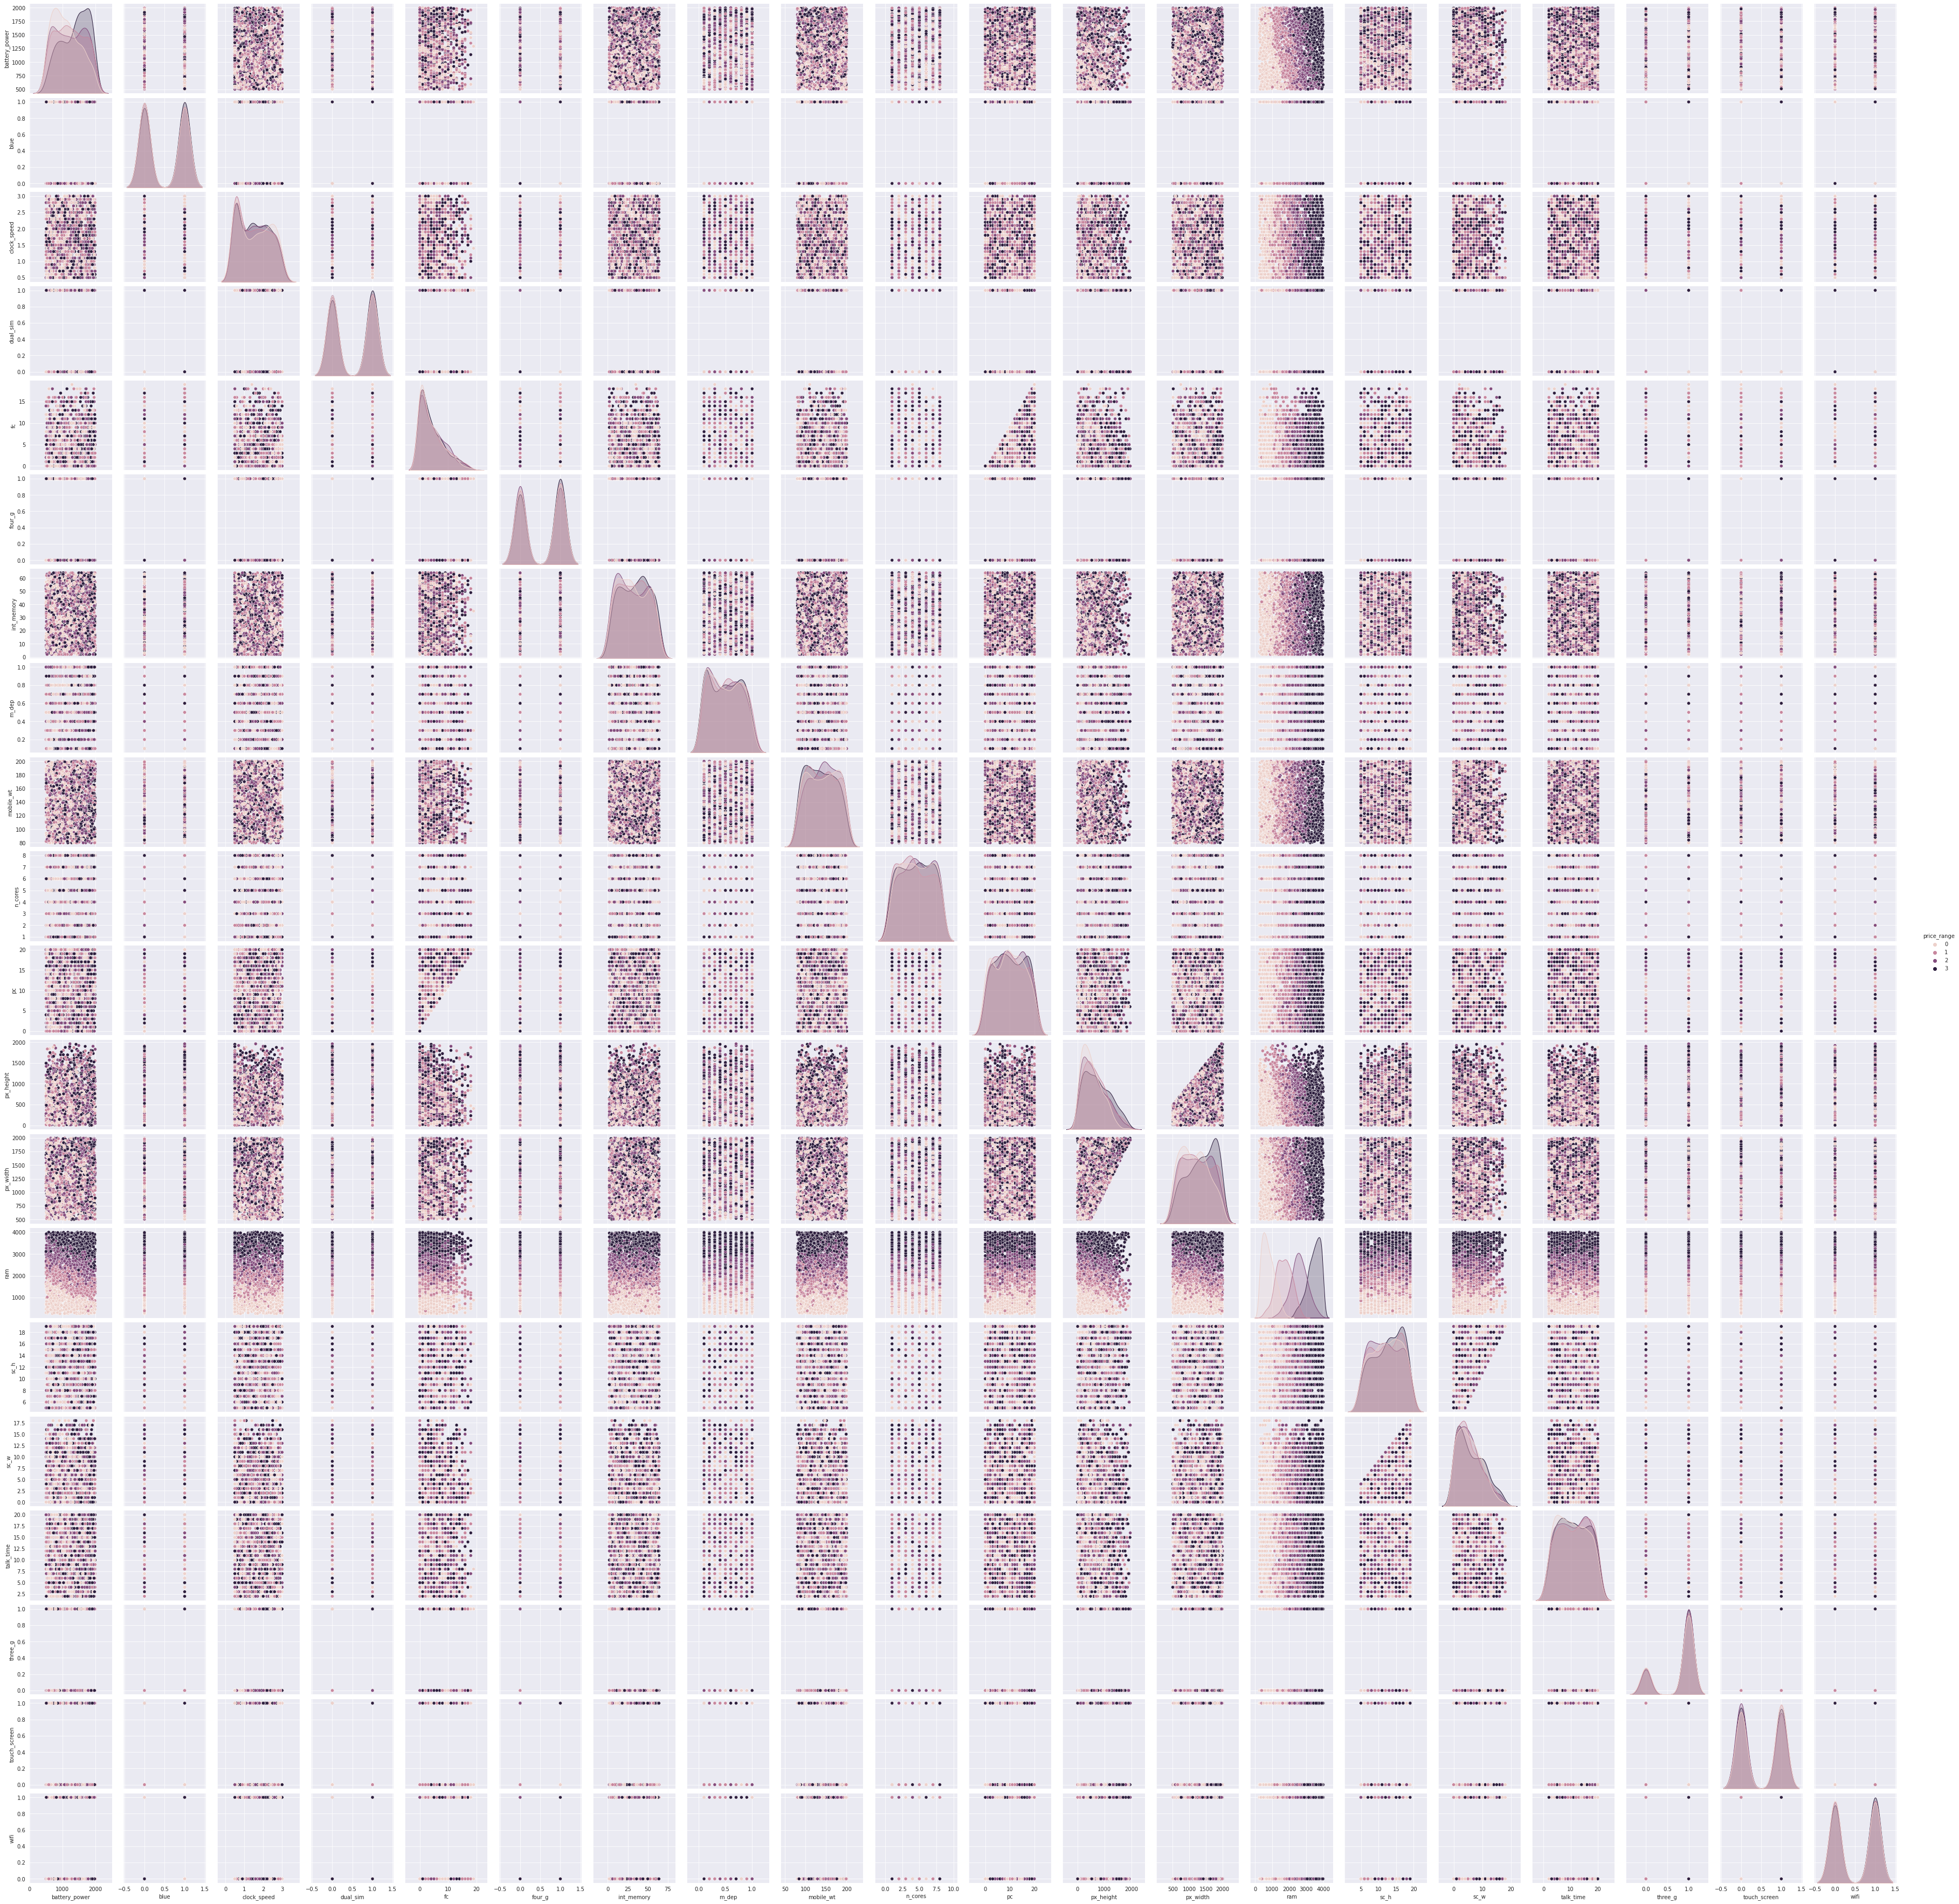

In [ ]:
# Chart - 1 visualization code
sns.pairplot(df,hue='price_range')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

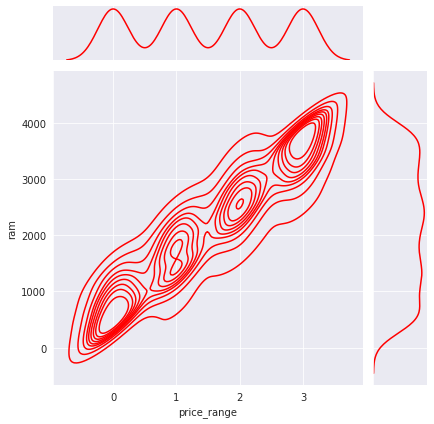

In [ ]:
# Chart - 2 visualization code
sns.jointplot(x='price_range',y='ram',data=df,color='red',kind='kde')

##### 1. Why did you pick the specific chart?

 **ANS -**  FOR SPECIFYING THAT HOW THE RAM WILL AFFECT THE PRICE IMPACT IN MOBILES

##### 2. What is/are the insight(s) found from the chart?

**ANS -** ITS AFFECTING HEAVILY

#### Chart - 3

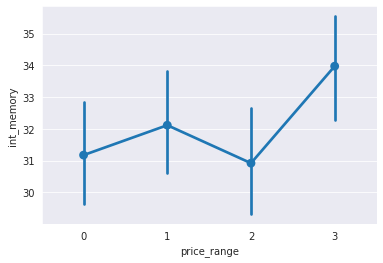

In [ ]:
# Chart - 3 visualization code
sns.pointplot(y="int_memory", x="price_range", data=df)


##### 1. Why did you pick the specific chart?

**ANS -** COMPARING Internal Memory vs Price Range

##### 2. What is/are the insight(s) found from the chart?

**ANS -** WITH INCREASE IN INTERNAL MEMORY THE PRICE ALSO INCREASES

#### Chart - 4

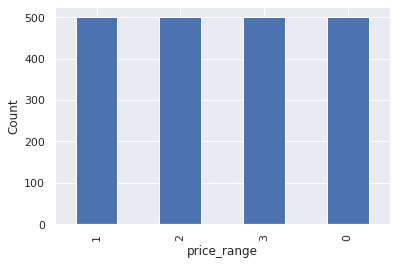

In [ ]:
# Chart - 4 visualization code
sns.set()
price_plot=df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

**Ans -** TO CHECK THE COUNTS OF PHONES AVAILABLE IN PRICE RANGE

##### 2. What is/are the insight(s) found from the chart?

**ANS -** there are mobile phones in 4 price ranges. The number of elements is almost similar.

#### Chart - 5

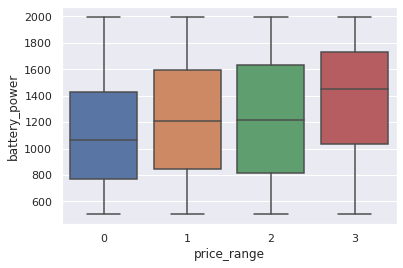

In [ ]:
# Chart - 5 visualization code
sns.boxplot(x="price_range", y="battery_power", data=df)


##### 1. Why did you pick the specific chart?

**Ans -** TO ANALYZE Battery power vs Price Range


##### 2. What is/are the insight(s) found from the chart?

**Ans -** WITH INCREASE IN YOUR PHONE BUDGET U CAN GET HIGHER BATTERY POWER

#### Chart - 6

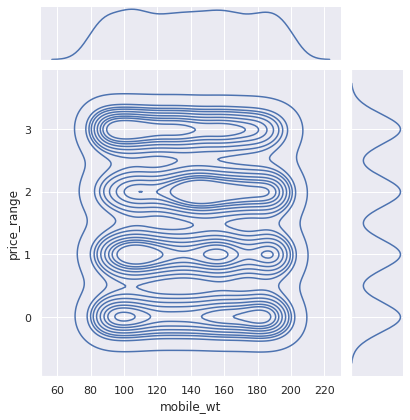

In [ ]:
# Chart - 6 visualization code
sns.jointplot(x='mobile_wt',y='price_range',data=df,kind='kde');


##### 1. Why did you pick the specific chart?

**ANS -** TO ANALYZE Mobile Weght vs Price range


##### 2. What is/are the insight(s) found from the chart?

**ANS -** IT BASICALLY DEPENDS ON MODEL SPECIFICATIONS

#### Chart - 7

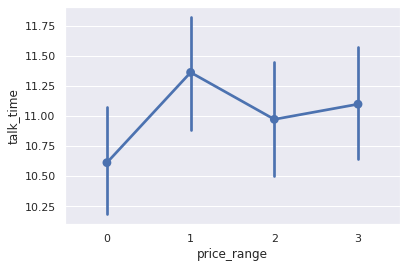

In [ ]:
# Chart - 7 visualization code
sns.pointplot(y="talk_time", x="price_range", data=df)


##### 1. Why did you pick the specific chart?

**ANS -** TO ANALYZE Talk time vs Price range


#### Chart - 8

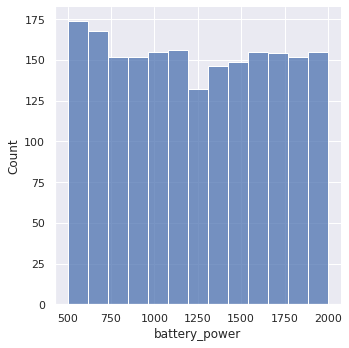

In [ ]:
# Chart - 8 visualization code

sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(df["battery_power"])
plt.show()

##### 1. Why did you pick the specific chart?

**Ans -** TO CHECK THE COUNTS OF PHONES AVAILABLE WITH BATTERY POWER

##### 2. What is/are the insight(s) found from the chart?

**Ans -** LOTS OF MOBILES AVAILABE WITH HIGH BATTERY POWER 


#### Chart - 9

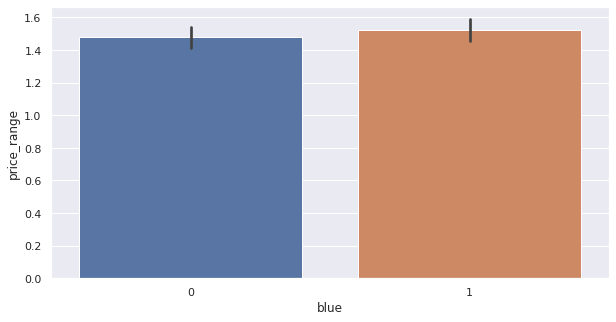

In [ ]:
# Chart - 9 visualization code
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='blue',y='price_range',ax=ax)

##### 1. Why did you pick the specific chart?

**ANS -** TO ANALYZE Bluetooth vs Price range

##### 2. What is/are the insight(s) found from the chart?

**ANS -** its better to buy mobiles with bluetooth as the price range is almost same 

#### Chart - 10

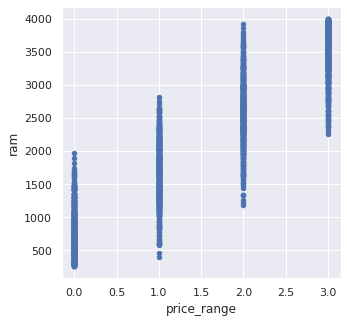

In [ ]:
# Chart - 10 visualization code

df.plot(x='price_range',y='ram',kind='scatter')
plt.show()

##### 1. Why did you pick the specific chart?

**ANS -** PRICE RANGE VS RAM

##### 2. What is/are the insight(s) found from the chart?

**ANS -** Ram has continuous increase with price range while moving from Low cost to Very high cost



#### Chart - 11

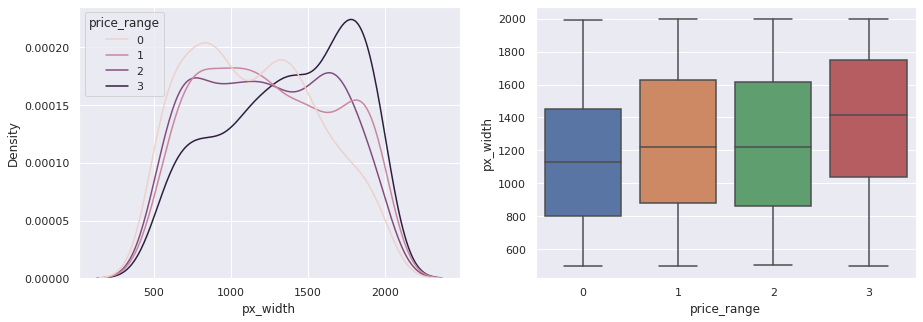

In [ ]:
# Chart - 11 visualization code

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_width', ax=axs[1])
plt.show()

##### 1. Why did you pick the specific chart?

**ANS _** TO ANALYZE PIXEL WIDTH WITH PRICE RANGE

##### 2. What is/are the insight(s) found from the chart?

**ANS -** There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.

#### Chart - 12

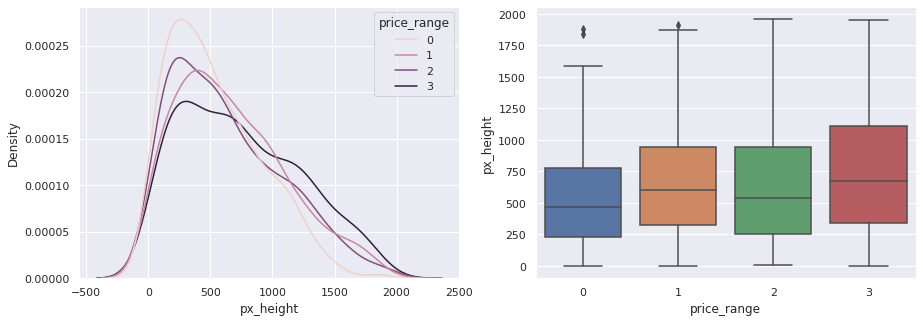

In [ ]:
# Chart - 12 visualization code

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_height', ax=axs[1])
plt.show()

##### 1. Why did you pick the specific chart?

**ANS -** TO ANALYZE PIXEL HEIGHT WITH PRICE 

##### 2. What is/are the insight(s) found from the chart?

**ANS -** Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height



#### Chart - 13

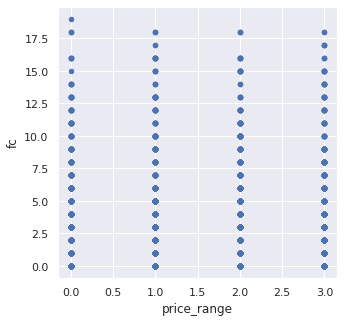

In [ ]:
# Chart - 13 visualization code

df.plot(x='price_range',y='fc',kind='scatter')
plt.show()

##### 1. Why did you pick the specific chart?

**ANS -** COMPARING FC (front camera megapixels) WITH PRICE RANGE 



##### 2. What is/are the insight(s) found from the chart?

**ANS -** U WILL GET HIGHER QUALITY FC WITH HIGH PRICE

## ***4. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


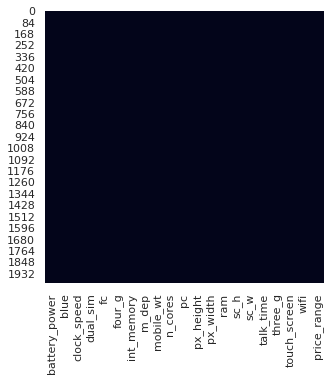

In [ ]:
# Handling Missing Values & Missing Value Imputation
df1=df.copy()
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### 2. Handling Outliers

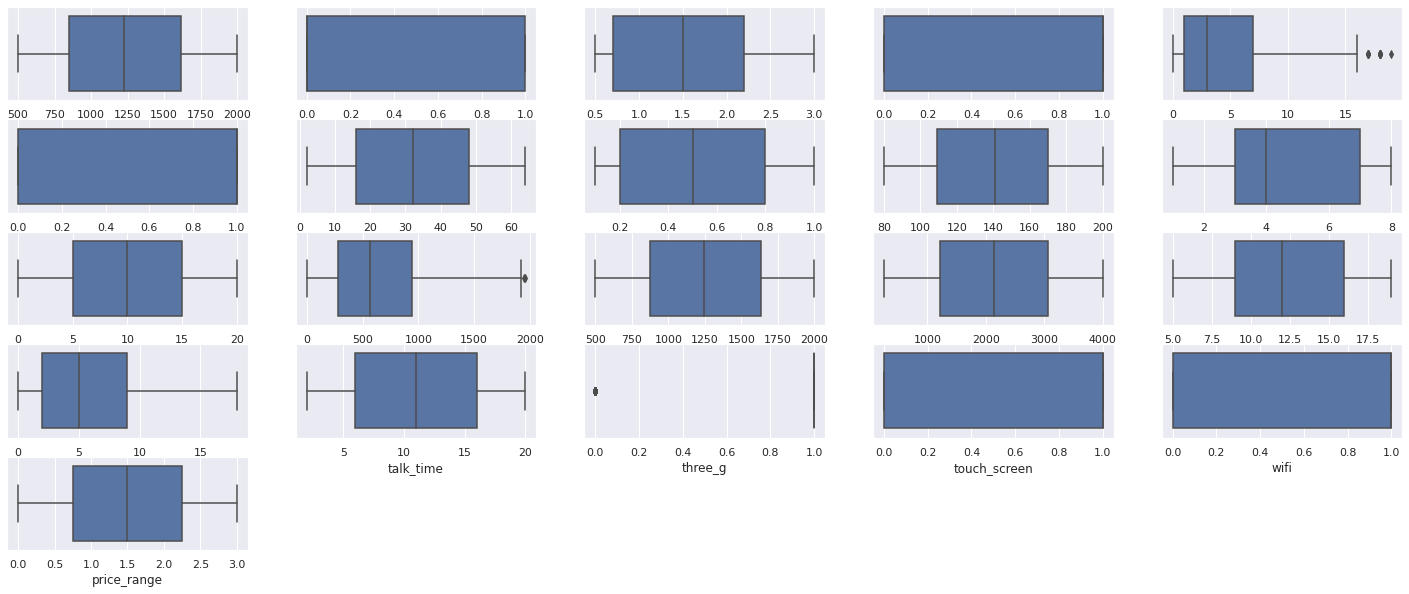

In [ ]:
# Handling Outliers & Outlier treatments
# looking for outliers using box plot
plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
print("\n")
     


##### What all outlier treatment techniques have you used and why did you use those techniques?

**ANS -** there are no much outliers



### 3. Data Transformation




In [ ]:
# Transform Your data
X = df.drop(['price_range'], axis = 1)
Y = df['price_range']
     

In [ ]:
X.shape


(2000, 20)

In [ ]:
Y.shape

(2000,)

### 4. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### 5. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.20, random_state = 42)
     


In [ ]:

X_train.shape

(1600, 20)

In [ ]:
y_train.shape


(1600,)

## ***5. ML Model Implementation***

### ML Model - LogisticRegression

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on the model


y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
# Evaluation metrics for test

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))
     

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       106
           1       0.95      0.91      0.92        95
           2       0.84      0.91      0.87        85
           3       0.96      0.95      0.96       114

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



#### 2. Cross- Validation & Hyperparameter Tuning

[[105   0   0   0]
 [  1  86   4   0]
 [  0   9  77   6]
 [  0   0   4 108]]


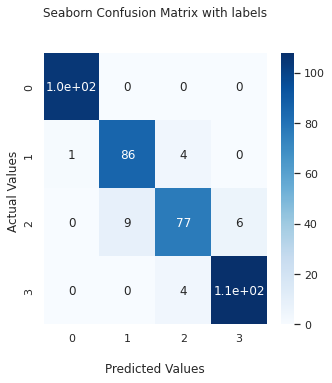

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

# Fit the Algorithm

# Predict on the model

In [ ]:

# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       408
           1       0.90      0.92      0.91       401
           2       0.90      0.93      0.92       394
           3       0.98      0.95      0.97       397

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600



### ML Model - Decision Tree

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Applying Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
# Prediction

y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

In [ ]:


accuracy_score(y_test, y_pred_test)

0.7975

In [ ]:
# Evaluation metrics for test

print('Classification report for Decision Tree (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        97
           1       0.77      0.73      0.75        96
           2       0.73      0.65      0.69       103
           3       0.81      0.88      0.84       104

    accuracy                           0.80       400
   macro avg       0.79      0.80      0.79       400
weighted avg       0.79      0.80      0.79       400



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Cross validation

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
grid.fit(X_train, y_train)
     

# Fit the Algorithm

# Predict on the model

# Prediction

y_pred_test = grid.predict(X_test)
y_pres_train = grid.predict(X_train)
# Evaluation metrics for test

print('Classification Report for Decision Tree (Test set)= ')
print(classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.800 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.819 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.803 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.772 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.794 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

[[ 91  14   0   0]
 [  5  77   9   0]
 [  0  12  65  15]
 [  0   0  12 100]]


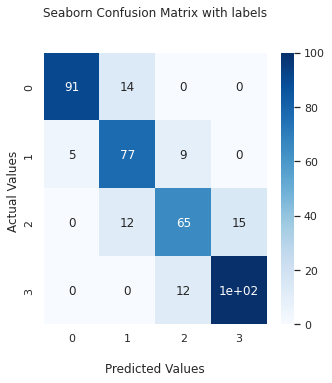

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

print('Classification Report for Decision Tree (Train set)= ')
print(classification_report(y_train, y_pred_train))
     

Classification Report for Decision Tree (Train set)= 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       395
           1       0.83      0.83      0.83       409
           2       0.80      0.82      0.81       408
           3       0.93      0.89      0.91       388

    accuracy                           0.87      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.87      0.87      0.87      1600



### ML Model -  K NEAREST NEIGHBOURS

In [ ]:
# ML Model - 3 Implementation
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

# Fit the Algorithm

# Predict on the model

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.score(X_test,y_test)


0.4475

In [ ]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))



Text(0, 0.5, 'Error Rate')

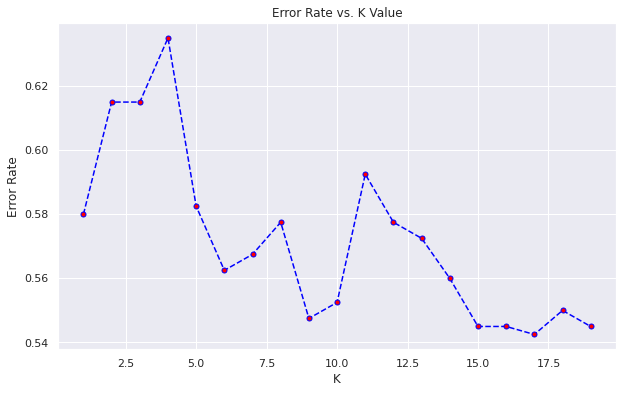

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# **Conclusion**

Write the conclusion here.
# 1. From EDA we can see that here are mobile phones in 4 price ranges. The number of elements is almost similar.
# 2. half the devices have Bluetooth, and half don’t
# 3. there is a gradual increase in battery as the price range increases
# 4. Ram has continuous increase with price range while moving from Low cost to Very high cost
# 5. costly phones are lighter
# 6. RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.
# 7. form all the above experiments we can conclude that logistic regression With using hyperparameters we got the best results

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***